In [1]:
import feather
import numpy as np 
import pandas as pd
from sklearn.preprocessing import (OneHotEncoder,StandardScaler)
from sklearn.pipeline import Pipeline

from sklearn.model_selection import (
    GridSearchCV,
    TimeSeriesSplit
)

In [2]:
from sklearn.compose import ColumnTransformer

In [3]:
#Modelos a utilizar:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
walmart= feather.read_dataframe('feathers/walmart_wide_train.feather')

In [5]:
walmart

,VisitNumber,TripType,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,...,DepartmentDescription_WIRELESS,regreso,variedad,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,5.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,0
1,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
2,8.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23,1,0,0,0,0,0,0
3,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
4,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95669,191343.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,0,0,0,1,0,0,0
95670,191344.0,22.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,1.0,0.0,4,0,0,0,1,0,0,0
95671,191345.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,13,0,0,0,1,0,0,0
95672,191346.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0


features:

In [6]:
#X = walmart.drop(['trip_type','visit_number'], axis=1)
X = walmart.drop(['TripType','VisitNumber'], axis=1)

In [7]:
X

,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,DepartmentDescription_BOYS WEAR,DepartmentDescription_BRAS & SHAPEWEAR,...,DepartmentDescription_WIRELESS,regreso,variedad,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,23,1,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7,0,0,0,1,0,0,0
95670,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4,0,0,0,1,0,0,0
95671,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13,0,0,0,1,0,0,0
95672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0


In [8]:
y=walmart.iloc[:,1]

In [9]:
y

0        999.0
1         30.0
2         26.0
3          8.0
4          8.0
         ...  
95669     25.0
95670     22.0
95671     39.0
95672     39.0
95673      8.0
Name: TripType, Length: 95674, dtype: float64

In [10]:
## Tomamos un sample

In [11]:
#X_sample = X[0:5000]
#y_sample = y[0:5000]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
X_train

,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,DepartmentDescription_BOYS WEAR,DepartmentDescription_BRAS & SHAPEWEAR,...,DepartmentDescription_WIRELESS,regreso,variedad,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
90220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11,0,0,1,0,0,0,0
30817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14,0,0,0,1,0,0,0
66821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
12400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12,0,1,0,0,0,0,0
81126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0,0
73349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
50057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,1,0,0,0,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train

,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,DepartmentDescription_BOYS WEAR,DepartmentDescription_BRAS & SHAPEWEAR,...,DepartmentDescription_WIRELESS,regreso,variedad,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
90220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11,0,0,1,0,0,0,0
30817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14,0,0,0,1,0,0,0
66821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,1,0,0,0,0,0,0
12400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12,0,1,0,0,0,0,0
81126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0,0
73349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,1,0,0,0
50057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17,0,0,0,1,0,0,0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,0,0,1,0,0,0,0


# Estandarización de variables

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([(('std_scaler', StandardScaler()))])

variedad = np.array(X_train["variedad"])[:, np.newaxis]

X_train["variedad"] = num_pipeline.fit_transform(variedad).copy()

<ipython-input-16-d065d97a99b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["variedad"] = num_pipeline.fit_transform(variedad).copy()


In [17]:
X_train

,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,DepartmentDescription_BOYS WEAR,DepartmentDescription_BRAS & SHAPEWEAR,...,DepartmentDescription_WIRELESS,regreso,variedad,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
90220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.502766,0,0,1,0,0,0,0
30817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.855228,0,0,0,1,0,0,0
66821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.554619,1,0,0,0,0,0,0
12400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.620254,0,1,0,0,0,0,0
81126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.672107,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.672107,0,0,0,0,1,0,0
73349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.672107,0,0,0,1,0,0,0
50057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.207690,0,0,0,1,0,0,0
5192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.554619,0,0,1,0,0,0,0


In [18]:
variedad_test = np.array(X_test["variedad"])[:, np.newaxis]

X_test["variedad"] = num_pipeline.transform(variedad_test).copy()

<ipython-input-18-f1a66ca5717c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["variedad"] = num_pipeline.transform(variedad_test).copy()


In [19]:
X_test

,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,DepartmentDescription_BOOKS AND MAGAZINES,DepartmentDescription_BOYS WEAR,DepartmentDescription_BRAS & SHAPEWEAR,...,DepartmentDescription_WIRELESS,regreso,variedad,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
68467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.672107,0,0,1,0,0,0,0
86823,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,1.0,-0.437132,1,0,0,0,0,0,0
2704,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.554619,1,0,0,0,0,0,0
66424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.554619,1,0,0,0,0,0,0
81495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.032817,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.672107,1,0,0,0,0,0,0
51577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.554619,0,0,0,1,0,0,0
39316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.032817,0,0,0,0,0,0,1
52202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.319645,0,0,0,1,0,0,0


# Feature selection

In [20]:
from sklearn.feature_selection import SelectFromModel

In [21]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))

In [22]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000))

In [23]:
sel.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False])

In [45]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

21

In [46]:
selected_feat

Index(['DepartmentDescription_BEAUTY',
       'DepartmentDescription_CANDY, TOBACCO, COOKIES',
       'DepartmentDescription_COMM BREAD', 'DepartmentDescription_DAIRY',
       'DepartmentDescription_DSD GROCERY',
       'DepartmentDescription_FINANCIAL SERVICES',
       'DepartmentDescription_FROZEN FOODS',
       'DepartmentDescription_GROCERY DRY GOODS',
       'DepartmentDescription_HOUSEHOLD CHEMICALS/SUPP',
       'DepartmentDescription_HOUSEHOLD PAPER GOODS',
       'DepartmentDescription_IMPULSE MERCHANDISE',
       'DepartmentDescription_INFANT CONSUMABLE HARDLINES',
       'DepartmentDescription_MENS WEAR',
       'DepartmentDescription_PERSONAL CARE',
       'DepartmentDescription_PETS AND SUPPLIES',
       'DepartmentDescription_PHARMACY OTC',
       'DepartmentDescription_PHARMACY RX', 'DepartmentDescription_PRODUCE',
       'DepartmentDescription_SERVICE DELI', 'regreso', 'variedad'],
      dtype='object')

In [ ]:
#Guardar un pickle 

In [27]:
import pickle

In [55]:
selected_feat

Index(['DepartmentDescription_BEAUTY',
       'DepartmentDescription_CANDY, TOBACCO, COOKIES',
       'DepartmentDescription_COMM BREAD', 'DepartmentDescription_DAIRY',
       'DepartmentDescription_DSD GROCERY',
       'DepartmentDescription_FINANCIAL SERVICES',
       'DepartmentDescription_FROZEN FOODS',
       'DepartmentDescription_GROCERY DRY GOODS',
       'DepartmentDescription_HOUSEHOLD CHEMICALS/SUPP',
       'DepartmentDescription_HOUSEHOLD PAPER GOODS',
       'DepartmentDescription_IMPULSE MERCHANDISE',
       'DepartmentDescription_INFANT CONSUMABLE HARDLINES',
       'DepartmentDescription_MENS WEAR',
       'DepartmentDescription_PERSONAL CARE',
       'DepartmentDescription_PETS AND SUPPLIES',
       'DepartmentDescription_PHARMACY OTC',
       'DepartmentDescription_PHARMACY RX', 'DepartmentDescription_PRODUCE',
       'DepartmentDescription_SERVICE DELI', 'regreso', 'variedad'],
      dtype='object')

In [ ]:
#Guarda un pickle: 

In [29]:
pickle.dump( selected_feat, open( "pickles/selected_feat", "wb" ) )

In [ ]:
#Carga el pickle: 

In [ ]:
selected_feat_ok = open("pickles/selected_feat","rb")

In [ ]:
selected_feat_ok = pickle.load(selected_feat_ok)

In [ ]:
selected_feat_ok 

## Otra Feature Selection

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [21]:
model_fs = ExtraTreesClassifier(n_estimators=500)
model_fs.fit(X_train,y_train)
print(model_fs.feature_importances_)

[1.69660823e-03 3.44070462e-03 1.16870488e-02 1.09221327e-02
 6.71687329e-03 1.70623409e-02 5.65635366e-03 2.64916808e-03
 5.77428501e-03 3.73566904e-03 1.01916013e-03 1.51608111e-02
 1.23219307e-02 1.51819233e-02 4.44192074e-04 1.15603740e-02
 2.92220247e-02 4.59468216e-02 9.13444404e-03 7.48462587e-03
 3.53825713e-02 1.79777593e-02 2.19100126e-03 5.22867346e-03
 3.63224758e-02 9.51512902e-03 6.23714771e-06 7.78908036e-03
 1.13958493e-02 5.82216964e-03 2.19099520e-02 1.67231159e-02
 2.53293120e-02 7.08517077e-03 1.82585130e-02 5.71494674e-03
 1.76484860e-03 1.29465774e-02 8.32239601e-04 1.00369203e-02
 1.09897635e-02 1.34574126e-02 4.78545206e-03 2.31470035e-02
 1.03730231e-03 3.43688828e-03 1.15121643e-02 3.06687133e-03
 5.02253682e-04 2.62991810e-04 4.09617958e-03 3.41556573e-02
 1.26344952e-02 3.35394640e-02 1.79739362e-02 2.09923195e-03
 1.31622960e-03 9.30583346e-03 3.18147651e-02 3.39972423e-03
 1.13039233e-04 2.38366461e-02 1.24454690e-03 1.16574613e-02
 4.52149707e-03 1.047887

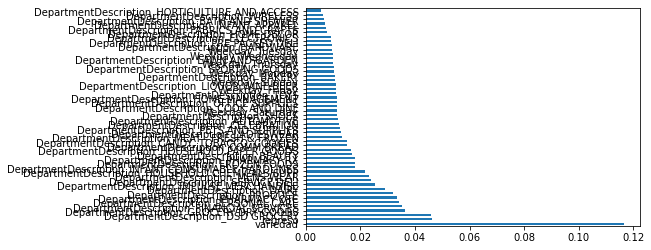

In [22]:
feat_importances = pd.Series(model_fs.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [23]:
feat_importances.nlargest(50)

variedad                                             0.116697
regreso                                              0.046390
DepartmentDescription_DSD GROCERY                    0.045947
DepartmentDescription_GROCERY DRY GOODS              0.036322
DepartmentDescription_FINANCIAL SERVICES             0.035383
DepartmentDescription_PERSONAL CARE                  0.034156
DepartmentDescription_PHARMACY OTC                   0.033539
DepartmentDescription_PRODUCE                        0.031815
DepartmentDescription_DAIRY                          0.029222
DepartmentDescription_IMPULSE MERCHANDISE            0.025329
DepartmentDescription_SERVICE DELI                   0.023837
DepartmentDescription_MENS WEAR                      0.023147
DepartmentDescription_HOUSEHOLD CHEMICALS/SUPP       0.021910
DepartmentDescription_INFANT CONSUMABLE HARDLINES    0.018259
DepartmentDescription_FROZEN FOODS                   0.017978
DepartmentDescription_PHARMACY RX                    0.017974
Departme

In [32]:
selected_var = feat_importances.nlargest(50).index

In [22]:
import pickle

In [33]:
#guardamos un pickle

pickle.dump(selected_var, open("pickles/selected_var", "wb"))

In [23]:
#cargamos el pickle
selected_var = pickle.load(open("pickles/selected_var","rb"))

In [24]:
selected_var

Index(['variedad', 'regreso', 'DepartmentDescription_DSD GROCERY',
       'DepartmentDescription_GROCERY DRY GOODS',
       'DepartmentDescription_FINANCIAL SERVICES',
       'DepartmentDescription_PERSONAL CARE',
       'DepartmentDescription_PHARMACY OTC', 'DepartmentDescription_PRODUCE',
       'DepartmentDescription_DAIRY',
       'DepartmentDescription_IMPULSE MERCHANDISE',
       'DepartmentDescription_SERVICE DELI', 'DepartmentDescription_MENS WEAR',
       'DepartmentDescription_HOUSEHOLD CHEMICALS/SUPP',
       'DepartmentDescription_INFANT CONSUMABLE HARDLINES',
       'DepartmentDescription_FROZEN FOODS',
       'DepartmentDescription_PHARMACY RX', 'DepartmentDescription_BEAUTY',
       'DepartmentDescription_HOUSEHOLD PAPER GOODS',
       'DepartmentDescription_COMM BREAD',
       'DepartmentDescription_CANDY, TOBACCO, COOKIES',
       'DepartmentDescription_MEAT - FRESH & FROZEN',
       'DepartmentDescription_LADIESWEAR',
       'DepartmentDescription_PETS AND SUPPLIES',


In [25]:
X_train_fs = X_train[selected_var]

In [26]:
X_test_fs = X_test[selected_var]

## X train y X test after feature selection:

In [47]:
X_train_feat_s = X_train[selected_feat]

In [49]:
X_test_feat_s = X_test[selected_feat]

In [ ]:
model = models_dict["random_forest"]["model"]

In [ ]:
#### NO SE SI SIRVE: 

    ## Grid search CV to select best possible model.
    grid_search = GridSearchCV(model,
                               models_dict["random_forest"]["param_grid"],
                               cv=TimeSeriesSplit(n_splits=time_series_splits),
                               scoring=evaluation_metric,
                               return_train_score=True,
                               n_jobs=-1
                               )

    grid_search.fit(X_train, y_train)

    print("\n++ Grid search results:\n")
    print("    ++++ Best parameters: {}".format(grid_search.best_params_))
    print("    ++++ Best estimator: {}".format(grid_search.best_estimator_))
    print("    ++++ Number of features in best estimator: {} \n".format(grid_search.best_estimator_.n_features_))
    print("    ++++ Best estimator score: {}\n".format(grid_search.best_score_))
    print("    ++++ Best estimator oob score: {}\n".format(grid_search.best_estimator_.oob_score_))


    ## Determining model's best estimators
    feature_importance = pd.DataFrame(
        {
            "Importance": grid_search.best_estimator_.feature_importances_,
            "Feature": df_features_prc_cols
        }
    )

# Modelos

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train_fs, y_train)
y_model = model.predict(X_test_fs)

In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model)))

Accuracy: 0.5881516785818806


In [58]:
pickle.dump( model, open( "pickles/random_forest_21_columns", "wb" ) )

In [ ]:
# Accuracy: 0.5881516785818806 con la seleccion de features de 21 variables.  

In [ ]:
# Con todo el data set nos habia dado accuracy: 0.6539343009931246

### Knn

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_feat_s, y_train)
y_model_knn = model_knn.predict(X_test_feat_s)

In [54]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_knn)))

Accuracy: 0.5689619131234583


### SVM

In [ ]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear', probability=True, random_state=0)
model_svm.fit(X_train, y_train)
y_model_svm = model_svm.predict(X_test)

In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_svm)))

### Árbol de Decisiones

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_model_dt = model_dt.predict(X_test)

In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_dt)))

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
model_gb = GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10)
model_gb.fit(X_train, y_train)
y_model_gb = model_gb.predict(X_test)

In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_gb)))

### ADABoost

In [ ]:
model_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
model_ab.fit(X_train, y_train)
y_model_ab = model_ab.predict(X_test)

In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test, y_model_ab)))

## Magic Loop

In [ ]:
from sklearn import metrics
def precision_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])
    return metrics.precision_score(y_true, y_pred)

In [ ]:
#magic loop pequeño, para ver qué pasa

In [ ]:
def define_hyper_params():
    clfs = {
        'RF': RandomForestClassifier(n_estimators=100),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'KNN': KNeighborsClassifier(n_neighbors=3) 
            }

    grid = { 
        'RF':{'n_estimators': [1,10,100,1000,10000], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
        'AB': { 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000,10000]},
        'GB': {'n_estimators': [1,10,100,1000,10000], 'learning_rate' : [0.001,0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [1,3,5,10,20,50,100]},
        'SVM' :{'C' :[0.00001,0.001,0.1,1],'kernel':['linear', 'rbf']},
        'KNN' :{'n_neighbors': [1,5,25,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}
           }

    return clfs, grid

In [ ]:
def magic_loop(models_to_run, clfs, grid, X, y, search = 1):
    for n in range(1, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        for index, clf in enumerate([clfs[x] for x in models_to_run]):
            print(models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            try:
                if(search):
                    gs = GridSearchCV(clf, parameter_values, cv=5)
                    start = time()
                    y_pred_probs = gs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    y_score = gs.fit(X_train, y_train).decision_function(X_test)
                    print(precision_at_k(y_test, y_pred_probs, 0.05))
                    print("GridSearch time: " + (str)(time() - start))

                else:
                    start = time()
                    rs = RandomizedSearchCV(clf, parameter_values, cv=5)
                    y_pred_probs = rs.fit(X_train, y_train).predict_proba(X_test)[:,1]
                    print(precision_at_k(y_test, y_pred_probs, 0.05)) 
                    print("RandomizedSearch time: " + (str)(time() - start))
            except IndexError as e:
                print('Error:', e)
                continue

In [ ]:
#falta arreglar
clfs, grid = define_hyper_params()
models = ['RF','AB','LR','ET','AB','GB','DT']
features = ['age', 'Class', 'Ticket', 'pounds', 'Group', 'Ship', 'Joined', 'Job', 'Boat', 'sex', 'boat_location']

In [ ]:
magic_loop(models, clfs, grid, X, y, search = 0)

In [ ]:
###################
## ML parameters ##
###################

## Models and parameters
models_dict = {

    "random_forest": {
        "model": RandomForestClassifier(
            max_features=6,
            n_estimators=10,
            max_leaf_nodes=10,
            oob_score=True,
            n_jobs=-1,
            random_state=1111
        ),
        "param_grid": {
            "n_estimators": [100, 300, 500, 800],
            "min_samples_leaf": [3, 5, 7],
            "criterion": ['gini']
        }
    },

    "decision_tree": {
        "model": DecisionTreeClassifier(
            random_state=2222
            ),
        "param_grid": {
            'max_depth': [5, 10, 15, None],
            'min_samples_leaf': [3, 5, 7]
        }
    },

}



In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

In [ ]:
def magic_loop(models_dict, df_imp_features_prc, df_labels):
    """
    """


    ## Splitting data in train and test
    X_train, X_test, y_train, y_test = train_test_split(df_imp_features_prc, df_labels, test_size=0.3)


    ##
    models_mloop = {}
    for mdl in models_dict:

        model = models_dict[mdl]["model"]

        grid_search = GridSearchCV(model,
                               models_dict[mdl]["param_grid"],
                               cv=TimeSeriesSplit(n_splits=time_series_splits),
                               scoring=evaluation_metric,
                               return_train_score=True,
                               n_jobs=-1
                               )
        grid_search.fit(X_train, y_train)

        models_mloop[mdl] = {
            "best_estimator": grid_search.best_estimator_,
            "best_estimator_score": grid_search.best_score_
        }

    sel_model = models_mloop[select_best_model(models_mloop)]["best_estimator"]


    return sel_model, X_train, X_test, y_train, y_test


In [ ]:
## Testing model with test data set.
def best_model_predict_test(sel_model, X_test):
    """
    Testing model with test data set.
        args:
            sel_model (sklearn model): best model obtained from magic loop.
            X_test (numpy array): dataset to test best model.
        returns:
            test_predict_labs (array): labels predicted by best model.
            test_predict_scores (array): probabilities related with classification by best model.
    """

    ## Predict test labels and probabilities with selected model.
    test_predict_labs = sel_model.predict(X_test)
    test_predict_scores = sel_model.predict_proba(X_test)

    return test_predict_labs, test_predict_scores